# PfDA Project 2: An Analysis of Paleo-Present Climate Data

***

<div align="justify">

### An overview of the *Luthi et al. 2008 Nature Paper* dataset: DC3_gas_a (yr): Investigating the concentration of greenhouse gases in the Earth’s atmosphere over the last 800,000 years

The dataset from the **Lüthi et al. 2008 Nature paper**, often referred to as the EPICA Dome C Ice Core dataset, is a paleoclimatic dataset derived from ice core samples taken from Dome Concordia (Dome C) in Antarctica. The paper, titled *"High-resolution carbon dioxide concentration record 650,000–800,000 years before present,"* provides valuable information about past climate conditions, particularly atmospheric CO2 levels, over an extended period of time.  

In fact, the dataset covers a time range of approximately 650,000 to 800,000 years before the present (BP) and it provides insights into Earth's climate history during this period. The primary focus of the dataset is to provide high-resolution measurements of atmospheric carbon dioxide (CO2) concentrations over the specified time range. These measurements are based on the examination of ice cores that are cylinders of ice drilled out of an ice sheet or glacier and that are essential for understanding past changes in greenhouse gas levels.  The dataset includes depth profiles, which indicate the depth within the ice core at which each measurement was taken. This allows researchers to establish a chronological order for the measurements and study changes over time. The measuraments were collected by multiple research groups, including Lüthi et al., the University of Bern, and LGGE in Grenoble, as indicated in the column headers and in different Antartica locations:  Dome C, Vostok site and Taylor Dome.  

The variable considered are **Depth**, the **EDC3 age scale**, which relates the age of the trapped air to the depth in the ice core from which the air was extracted, the  **Carbon Dioxide** and **Sigma** error, namely the uncertainty or error associated with the measurements, considered in units of *"ppmv"*: parts per million by volume.

One of the significant contributions of **The Lüthi et al. 2008 paper** is its high-resolution measurements of CO2 concentrations, which provide insights into shorter-term climate variations within the broader timespan. My main source for the present information is [the ANSTO document](https://www.ansto.gov.au/sites/default/files/2019-06/information%20processing%20updated%20to%20new%20format%20%282%29.pdf) released by the Australian Governament.</div>

<div align="center">

![Antartica Sites](img/Map-of-the-Antarctic-region-including-the-Talos-Dome-TD-Vostok-Taylor-Dome-Taylor.png.jpeg)

</div>

<div align="justify">

To begin my analysis of paleo-present climate data, I am starting by examining the "New CO2 Data" section from the **Luthi et al. 2008 Nature Paper**. My aim is to look for patterns or trends in the CO2 levels and temperature anomalies over the specified time range (800kyrs – present) and, in this manner, I am presenting an initial overview of the relationship between CO2 and temperature.

Next, I am proceeding to explore the "Vostok TD-Dome C" section in search of additional insights or data related to CO2 and temperature anomalies trying to establish any correlations or variations that may emerge.

Finally, I am focusing my attention to review the "Composite CO2" section in order to reach a first sythesis of the entity of the climate change the data display throughout the specified time frame.

This first approach represents the foundation of my investigation into the paleo-present climate data and its correlation between CO2 and temperature anomalies.</div>

In [1]:
# Importing necessary libraries: Pandas for data manipulation, Matplotlib and Seaborn for plotting data.
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Reading CO2 data from Luthi et al. 2008 Nature Paper dataset and using 'header' parameter to specify the row that contains column names (0-based index)
# The 'skiprows' parameter is used to skip the rows above the data
df = pd.read_excel('/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/41586_2008_BFnature06949_MOESM31_ESM-3.xls', header=5, skiprows=[6])


df.columns = ["Depth (m)", "EDC3_gas_a (yr) (University of Bern)", "CO2 (ppmv) (University of Bern)", "sigma (ppmv) (University of Bern)",
              "Depth (m) (LGGE University of Grenoble)", "EDC3_gas_a (yr) (LGGE University of Grenoble)", "CO2 (ppmv) (LGGE University of Grenoble)"]

# Display the data
print(df)

     Depth (m)  EDC3_gas_a (yr) (University of Bern)  \
0      3026.58                                611269   
1      3030.97                                616164   
2      3036.44                                623109   
3      3040.87                                630183   
4      3043.07                                635364   
..         ...                                   ...   
242    3187.87                                794608   
243    3188.23                                795202   
244    3188.98                                796467   
245    3189.33                                797099   
246    3190.08                                798512   

     CO2 (ppmv) (University of Bern)  sigma (ppmv) (University of Bern)  \
0                              257.8                                2.1   
1                              252.6                                0.6   
2                              243.3                                2.8   
3                          

<div align="justify">

### First section: New CO2 data analysis

The dataset has been downloaded in *Excel* format and its first section contains data collected from two different universities: the University of Bern and LGGE (University of Grenoble). The information belong the same area of exploration, **Dome C**, but refer to distinct time periods.

+ **University of Bern Data**:
Time Period: The University of Bern's data spans from 611,269 to 798,512 years ago.
Location: This data pertains to the Dome C research site.
- **LGGE (University of Grenoble) Data**:
Time Period: LGGE University of Grenoble's data covers a different time range, from 667,435 to 798,893 years ago.
Location: Similar to the University of Bern, this data also originates from the Dome C site.</div>

In [2]:
# Preprocessing data: missing values are not critical for my analysis.
print(df.isnull().sum())

Depth (m)                                          0
EDC3_gas_a (yr) (University of Bern)               0
CO2 (ppmv) (University of Bern)                    0
sigma (ppmv) (University of Bern)                  0
Depth (m) (LGGE University of Grenoble)          200
EDC3_gas_a (yr) (LGGE University of Grenoble)    200
CO2 (ppmv) (LGGE University of Grenoble)         200
dtype: int64


In [6]:
# to get information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Depth (m)                                      47 non-null     float64
 1   EDC3_gas_a (yr) (University of Bern)           47 non-null     int64  
 2   CO2 (ppmv) (University of Bern)                47 non-null     float64
 3   sigma (ppmv) (University of Bern)              47 non-null     float64
 4   Depth (m) (LGGE University of Grenoble)        47 non-null     float64
 5   EDC3_gas_a (yr) (LGGE University of Grenoble)  47 non-null     float64
 6   CO2 (ppmv) (LGGE University of Grenoble)       47 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.9 KB


In [5]:
# First five rows of the dataset dispayed
print(df.head())

   Depth (m)  EDC3_gas_a (yr) (University of Bern)  \
0    3026.58                                611269   
1    3030.97                                616164   
2    3036.44                                623109   
3    3040.87                                630183   
4    3043.07                                635364   

   CO2 (ppmv) (University of Bern)  sigma (ppmv) (University of Bern)  \
0                            257.8                                2.1   
1                            252.6                                0.6   
2                            243.3                                2.8   
3                            204.4                                0.9   
4                            195.0                                1.5   

   Depth (m) (LGGE University of Grenoble)  \
0                                  3061.71   
1                                  3063.98   
2                                  3085.78   
3                                  3086.88   
4     

In [18]:
# Display statistics about data
df.describe()

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m)_LGGE,EDC3_gas_a (yr)_LGGE,CO2 (ppmv)_LGGE
count,247.000000,247.000000,247.000000,247.000000,47.000000,47.000000,47.00000
mean,3123.501134,723999.655870,216.088664,1.248178,3148.893617,750698.170213,222.33617
std,40.589369,41319.636469,20.259783,0.614713,35.427754,36597.113508,20.93293
min,3026.580000,611269.000000,171.600000,0.200000,3061.710000,667435.000000,178.50000
25%,3089.115000,690175.500000,203.950000,0.800000,3130.880000,729879.000000,208.15000
50%,3125.530000,723464.000000,218.400000,1.100000,3160.580000,760338.000000,224.20000
75%,3159.535000,759094.500000,231.850000,1.600000,3174.330000,778397.500000,238.95000
max,3190.080000,798512.000000,260.300000,3.700000,3190.280000,798893.000000,256.60000


<div align="justify">

### Examinig relationship between CO2 levels and ECD3 age scale

The **Pearson Correlation Coefficient** can allow to measure the linear relationship between two continuous variables, such as CO2 levels and EDC3_gas_a (yr). A positive correlation indicates a positive linear relationship, while a negative correlation indicates a negative linear relationship. This technique is used to to assess relationships between variables. It helps researchers and analysts understand whether and to what extent two variables are related in a linear fashion. Even if two variables are highly correlated, it does not necessarily mean that changes in one variable cause changes in the other; correlation only quantifies the strength and direction of the linear relationship. My studies on *Pearson Correlation Coefficient* is based on [Statistics How To](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/).</div>

In [12]:
# Pearson Correlation Coefficient applied for the University of Bern data.
correlation = df['CO2 (ppmv) (University of Bern)'].corr(df['EDC3_gas_a (yr) (University of Bern)'])
print(f"Pearson Correlation for University of Bern Dome C data: {correlation}")

Pearson Correlation for University of Bern Dome C data: -0.14867679227276345


In [11]:
# Pearson Correlation Coefficient applied for the LGGE University of Grenoble data.
correlation = df ['CO2 (ppmv) (LGGE University of Grenoble)'].corr(df['EDC3_gas_a (yr) (LGGE University of Grenoble)'])
print(f"Pearson Correlation for LGGE University of Grenoble Dome C data: {correlation}")

Pearson Correlation for LGGE University of Grenoble Dome C data: 0.308752341075156


<div align="justify">

The *University of Bern's data* shows a weak negative correlation, suggesting a very mild tendency for one variable to decrease as the other increases. *LGGE University of Grenoble's data* exhibits a moderate positive correlation, indicating a more noticeable tendency for both variables to increase together, but it is not a very strong correlation. However,  it is crucial to emphasize that correlation measures only the strength and direction of the linear relationship between these variables. It does not address causation or non-linear relationships that may exist within the dataset. To truly understand the patterns and potential causal factors at play, further research and analysis are necessary.  Correlation, though informative, is just one piece of the puzzle in data analysis. </div>

<div align="justify">

### A first visual glimpse of the CO2 trend shown from the two Dome C data collections

The purpose of the graph is to visually compare and analyze the CO2 concentration patterns as they evolve over time, as represented by the EDC3 age scale. By plotting both datasets on the same graph, it is possible to observe how CO2 levels change over the specified age range for each dataset. In fact, during specific time intervals, on the EDC3 age scale, the CO2 levels measured by both University of Bern and LGGE University of Grenoble equipment show consistency or convergence. The use of line plots allow to easily identify the trend during specific, well-defined segments of the EDC3 age scale and the confirmation of similar trends adds strength to the dataset's credibility.</div>

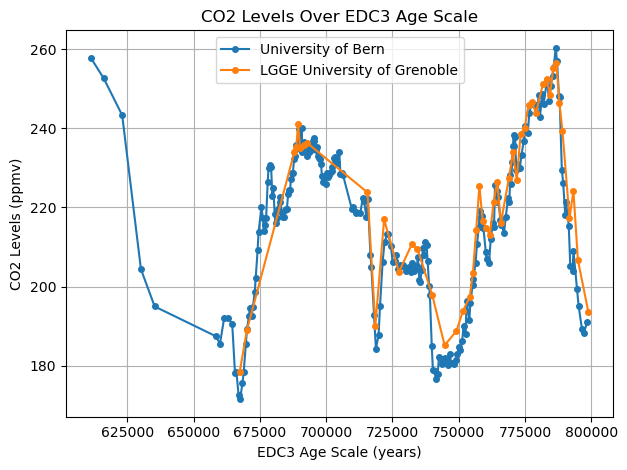

In [3]:
# Extract the relevant columns for University of Bern data.
co2_bern = df['CO2 (ppmv) (University of Bern)']
age_bern = df['EDC3_gas_a (yr) (University of Bern)']

# Extract the relevant columns for LGGE University of Grenoble data.
co2_grenoble = df['CO2 (ppmv) (LGGE University of Grenoble)']
age_grenoble = df['EDC3_gas_a (yr) (LGGE University of Grenoble)']

# Create a line plot for University of Bern data.
plt.plot(age_bern, co2_bern, label='University of Bern', linestyle='-', marker='o', markersize=4)

# Create a line plot for LGGE University of Grenoble data.
plt.plot(age_grenoble, co2_grenoble, label='LGGE University of Grenoble', linestyle='-', marker='o', markersize=4)

# Set labels and title.
plt.xlabel('EDC3 Age Scale (years)')
plt.ylabel('CO2 Levels (ppmv)')
plt.title('CO2 Levels Over EDC3 Age Scale')

# Add legend.
plt.legend()

# Display the plot.
plt.grid(True)
plt.tight_layout()
plt.show()

<div align="justify">

### Second section: Vostok-TD-Dome C

In this second section of the dataset, the information is subdivided into distinct sites and corresponding time periods, providing valuable insights into past climate conditions. My source of information to open and manipulate data from a multiple worksheet with Pandas is [www.SparkByExamples.com](https://sparkbyexamples.com/pandas/pandas-read-excel-multiple-sheets-in-pandas/).</div>

In [29]:
# Uploading again the Lüthi et al. 2008 Nature paper to explore the second part of the dtaset.
excel_file_path = '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/41586_2008_BFnature06949_MOESM31_ESM-3.xls'
sheet_name = '2.  Vostok-TD-Dome C'

# Read the second worksheet and skip appropriate rows.
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)


# Read the second worksheet and skip appropriate rows.
df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header=6)  # Skipping the first 6 rows (headers).

# Extract the specified columns for each group and create separate DataFrames.
dome_c_0_22 = df.iloc[:, :4]  # Columns A to D.
vostok = df.iloc[:, 4:7]  # Columns E to G.
taylor_dome = df.iloc[:, 7:11]  # Columns H to K.
dome_c_393_664 = df.iloc[:, 11:15]  # Columns L to O.
dome_c_393_664_lgge = df.iloc[:, 15:18]  # Columns P to R.
dome_c_611_800 = df.iloc[:, 18:22]  # Columns S to V.
dome_c_611_800_lgge = df.iloc[:, 22:25]  # Columns W to Y.

# Rename the columns of each DataFrame.
dome_c_0_22.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)', 'sigma (ppmv)']
vostok.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)']
taylor_dome.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)', 'sigma (ppmv)']
dome_c_393_664.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)', 'sigma (ppmv)']
dome_c_393_664_lgge.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)']
dome_c_611_800.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)', 'sigma (ppmv)']
dome_c_611_800_lgge.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)']


# Printing a general overview of the worksheet.
print (df)

     Depth (m)  EDC3_gas_a (yr)  CO2 (ppmv)  sigma (ppmv)  Depth (m).1  \
0       102.83            137.0       280.4           1.8       149.10   
1       106.89            268.0       274.9           0.7       173.10   
2       107.20            279.0       277.9           0.7       177.40   
3       110.25            395.0       279.1           1.3       228.60   
4       110.50            404.0       281.9           1.1       250.30   
..         ...              ...         ...           ...          ...   
367        NaN              NaN         NaN           NaN      3340.39   
368        NaN              NaN         NaN           NaN      3343.39   
369        NaN              NaN         NaN           NaN      3346.51   
370        NaN              NaN         NaN           NaN      3346.56   
371        NaN              NaN         NaN           NaN      3349.51   

     EDC3_gas_a (yr).1  CO2 (ppmv).1  Depth (m).2  \
0                 2690         284.7       380.82   
1    

<div align="justify"> 

The data collected by the two different universities, the University of Bern and LGGE University of Grenoble, differ in terms of site and EDC3 age of the samples:

+ University of Bern

**Dome C**
*EDC3 Age Scale**: 137 - 3190.08 years before present (kyr BP)

**Taylor Dome**
*EDC3 Age Scale*: 18906 - 63205 years before present (kyr BP)

* LGGE University of Grenoble

**Vostok**
*EDC3 Age Scale*: 2690 - 438986 years before present (kyr BP)

**Dome C**
*EDC3 Age Scale* (2nd Period): 392544 - 798893 years before present (kyr BP)</div>


In [39]:
# Eliminating null values from columns for representation
dome_c_0_22 = dome_c_0_22.dropna()
vostok = vostok.dropna()
taylor_dome = taylor_dome.dropna()
dome_c_393_664 = dome_c_393_664.dropna()
dome_c_393_664_lgge = dome_c_393_664_lgge.dropna()
dome_c_611_800 = dome_c_611_800.dropna()
dome_c_611_800_lgge = dome_c_611_800_lgge.dropna()

In [40]:
# For dome_c_0_22
print("Dome C (0-22 kyr BP0 University of Bern)")
print("First year:", dome_c_0_22["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", dome_c_0_22["EDC3_gas_a (yr)"].iloc[-1])

# For vostok
print("\nVostok (0-440 kyr BP) LGGE in Grenoble")
print("First year:", vostok["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", vostok["EDC3_gas_a (yr)"].iloc[-1])

# For taylor_dome
print("\nTaylor Dome (19-63 kyr BP) University of Bern")
print("First year:", taylor_dome["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", taylor_dome["EDC3_gas_a (yr)"].iloc[-1])

# For dome_c_393_664
print("\nDome C (393-664 kyr BP) University of Bern")
print("First year:", dome_c_393_664["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", dome_c_393_664["EDC3_gas_a (yr)"].iloc[-1])

# For dome_c_393_664_lgge
print("\nDome C (393-664 kyr BP) LGGE in Grenoble")
print("First year:", dome_c_393_664_lgge["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", dome_c_393_664_lgge["EDC3_gas_a (yr)"].iloc[-1])

# For dome_c_611_800
print("\nDome C (611-800 kyr BP) University of Bern")
print("First year:", dome_c_611_800["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", dome_c_611_800["EDC3_gas_a (yr)"].iloc[-1])

# For dome_c_611_800_lgge
print("\nDome C (611-800 kyr BP) LGGE of Grenoble")
print("First year:", dome_c_611_800_lgge["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", dome_c_611_800_lgge["EDC3_gas_a (yr)"].iloc[-1])


Dome C (0-22 kyr BP0 University of Bern)
First year: 137.0
Last year: 22015.0

Vostok (0-440 kyr BP) LGGE in Grenoble
First year: 2690
Last year: 438986

Taylor Dome (19-63 kyr BP) University of Bern
First year: 18906.0
Last year: 63205.0

Dome C (393-664 kyr BP) University of Bern
First year: 415717.0
Last year: 664690.0

Dome C (393-664 kyr BP) LGGE in Grenoble
First year: 392544.0
Last year: 426953.0

Dome C (611-800 kyr BP) University of Bern
First year: 611269.0
Last year: 798512.0

Dome C (611-800 kyr BP) LGGE of Grenoble
First year: 667435.0
Last year: 798893.0


<div align="justify">

### Representation of the CO2 trend over th ECDC3 period considered in different sites

The following graphs present an intriguing comparison of CO2 trends over different time periods, revealing significant insights into the Earth's climate history. It is evident that the trends of CO2 concentration seem to follow a recurring pattern, with peaks occurring approximately every 100,000 years. This suggests that natural climate cycles may have played a significant role in shaping CO2 levels over geological time scales.  It's also important to note that the current age is situated in the middle of a CO2 concentration trend that began approximately 20,000 years ago. This means that we are currently experiencing a phase within a larger climate cycle that has been ongoing for millennia.</div>

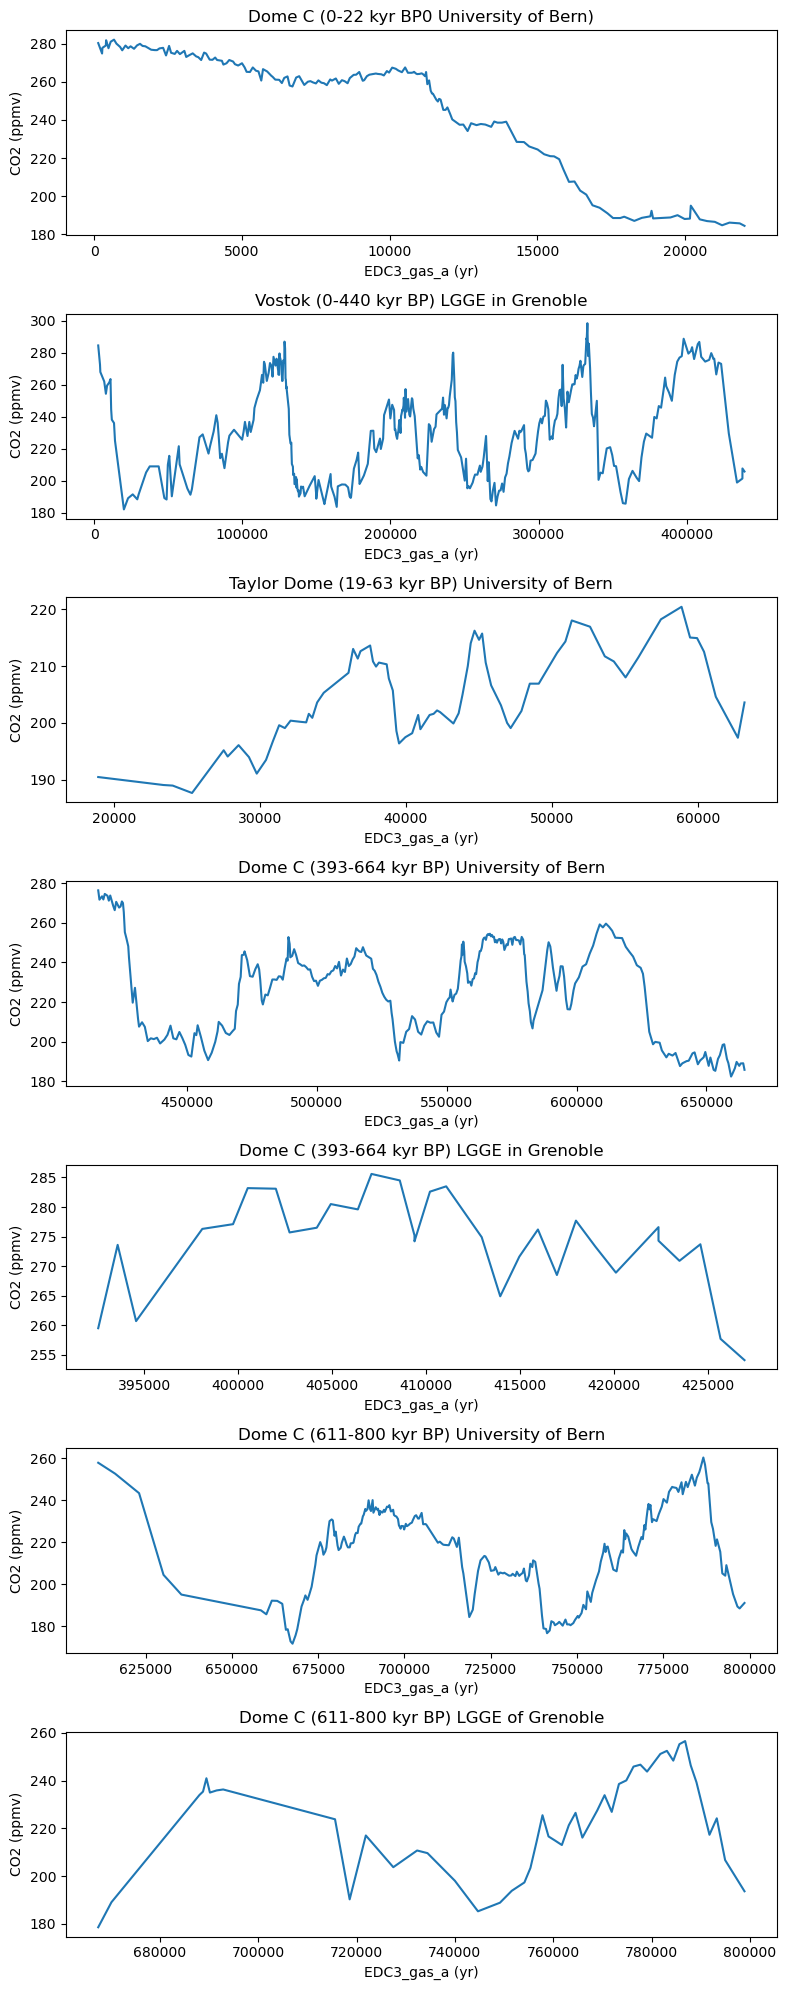

In [38]:
# Set up the subplots for the seven variables
fig, axes = plt.subplots(7, 1, figsize=(8, 20))

# Plot for Dome C (0-22 kyr BP0 University of Bern)
axes[0].plot(dome_c_0_22["EDC3_gas_a (yr)"], dome_c_0_22["CO2 (ppmv)"])
axes[0].set_title("Dome C (0-22 kyr BP0 University of Bern)")
axes[0].set_xlabel("EDC3_gas_a (yr)")
axes[0].set_ylabel("CO2 (ppmv)")

# Plot for Vostok (0-440 kyr BP) LGGE in Grenoble
axes[1].plot(vostok["EDC3_gas_a (yr)"], vostok["CO2 (ppmv)"])
axes[1].set_title("Vostok (0-440 kyr BP) LGGE in Grenoble")
axes[1].set_xlabel("EDC3_gas_a (yr)")
axes[1].set_ylabel("CO2 (ppmv)")

# Plot for Taylor Dome (19-63 kyr BP) University of Bern
axes[2].plot(taylor_dome["EDC3_gas_a (yr)"], taylor_dome["CO2 (ppmv)"])
axes[2].set_title("Taylor Dome (19-63 kyr BP) University of Bern")
axes[2].set_xlabel("EDC3_gas_a (yr)")
axes[2].set_ylabel("CO2 (ppmv)")

# Plot for Dome C (393-664 kyr BP) University of Bern
axes[3].plot(dome_c_393_664["EDC3_gas_a (yr)"], dome_c_393_664["CO2 (ppmv)"])
axes[3].set_title("Dome C (393-664 kyr BP) University of Bern")
axes[3].set_xlabel("EDC3_gas_a (yr)")
axes[3].set_ylabel("CO2 (ppmv)")

# Plot for Dome C (393-664 kyr BP) LGGE in Grenoble
axes[4].plot(dome_c_393_664_lgge["EDC3_gas_a (yr)"], dome_c_393_664_lgge["CO2 (ppmv)"])
axes[4].set_title("Dome C (393-664 kyr BP) LGGE in Grenoble")
axes[4].set_xlabel("EDC3_gas_a (yr)")
axes[4].set_ylabel("CO2 (ppmv)")

# Plot for Dome C (611-800 kyr BP) University of Bern
axes[5].plot(dome_c_611_800["EDC3_gas_a (yr)"], dome_c_611_800["CO2 (ppmv)"])
axes[5].set_title("Dome C (611-800 kyr BP) University of Bern")
axes[5].set_xlabel("EDC3_gas_a (yr)")
axes[5].set_ylabel("CO2 (ppmv)")

# Plot for Dome C (611-800 kyr BP) LGGE of Grenoble
axes[6].plot(dome_c_611_800_lgge["EDC3_gas_a (yr)"], dome_c_611_800_lgge["CO2 (ppmv)"])
axes[6].set_title("Dome C (611-800 kyr BP) LGGE of Grenoble")
axes[6].set_xlabel("EDC3_gas_a (yr)")
axes[6].set_ylabel("CO2 (ppmv)")

# Adjust layout and show plots
plt.tight_layout()
plt.show()